## Import libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Set display options


In [11]:
pd.set_option('display.max_columns', None)

## Load the data


In [52]:
df = pd.read_csv('Customer-Churn.csv')

## Display basic info


In [55]:
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("\nFirst few rows:")
df.head()

Dataset loaded successfully!
Shape: 7043 rows, 21 columns

First few rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [56]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Churn VS Stayed Customers

In [71]:
print(df['Churn'].value_counts())
print("\nChurn Rate:")
print(df['Churn'].value_counts(normalize=True) * 100)

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Rate:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [59]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Describing the Data

In [61]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Check for missing values

In [70]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Unique Values in Churn

In [69]:
print("\nChurn column values:")
print(df['Churn'].unique())


Churn column values:
['No' 'Yes']


## Check data types

In [68]:
print("\nData types:")
print(df.dtypes)


Data types:The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


# Analysis Question

### Do new customers churn more than loyal customers?

/var/folders/hy/lxcrlj2n7nxgtrrrh6fmr6n40000gn/T/ipykernel_6263/3083932952.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()


Churn               No       Yes
tenure_group                    
0-12 months   0.523218  0.476782
12-24 months  0.712891  0.287109
24-48 months  0.796110  0.203890
48+ months    0.904868  0.095132


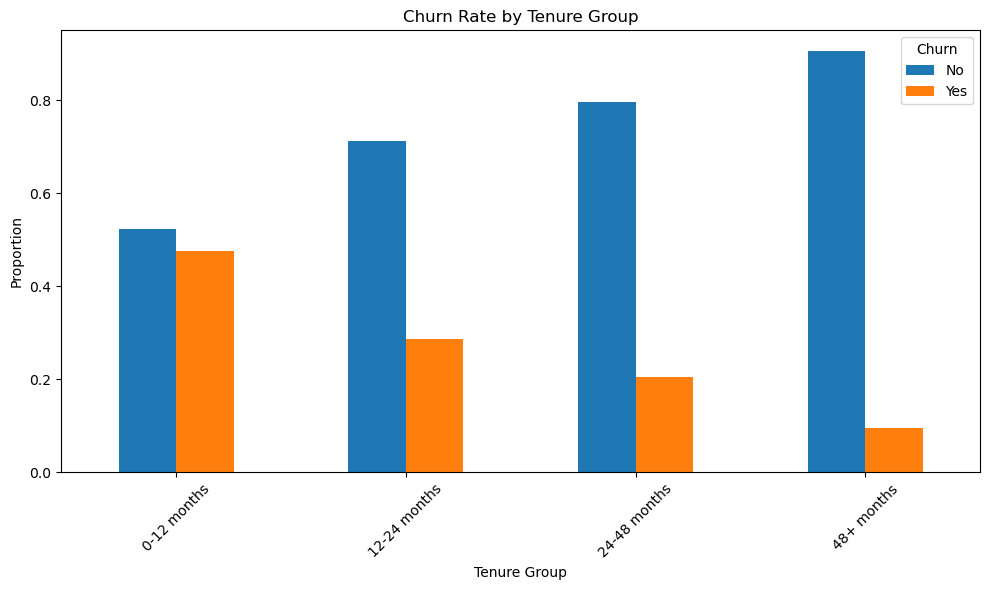

In [72]:
# Create tenure groups
df['tenure_group'] = pd.cut(df['tenure'], 
                             bins=[0, 12, 24, 48, 72], 
                             labels=['0-12 months', '12-24 months', '24-48 months', '48+ months'])

# Churn rate by tenure group
churn_by_tenure = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack()
print(churn_by_tenure)

# Visualize
churn_by_tenure.plot(kind='bar', stacked=False, figsize=(10,6))
plt.title('Churn Rate by Tenure Group')
plt.ylabel('Proportion')
plt.xlabel('Tenure Group')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Do monthly charges affect churn?

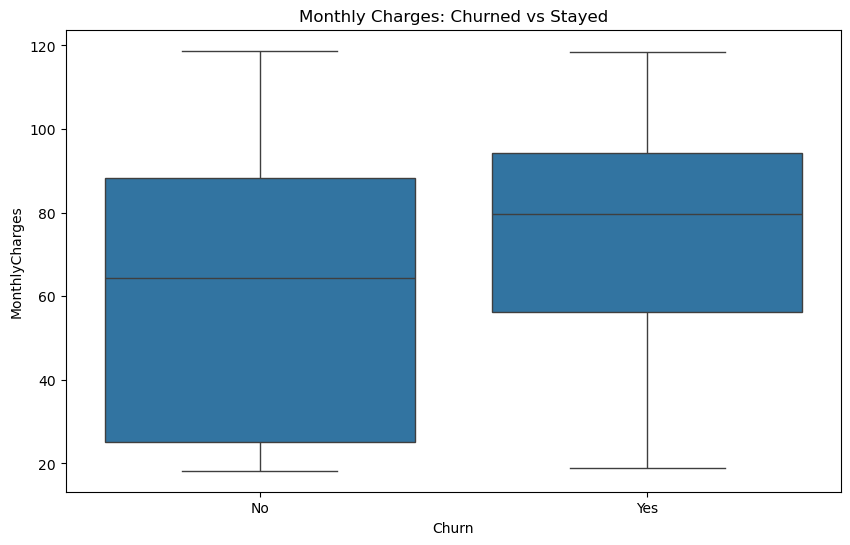


Average Monthly Charges:
Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64


In [73]:
# Compare monthly charges between churned and stayed customers
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges: Churned vs Stayed')
plt.show()

# Statistics
print("\nAverage Monthly Charges:")
print(df.groupby('Churn')['MonthlyCharges'].mean())

In [74]:
print(df.columns.tolist())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group']


### Churn by contract type

Contract Type Distribution:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Churn Rate by Contract Type:
Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


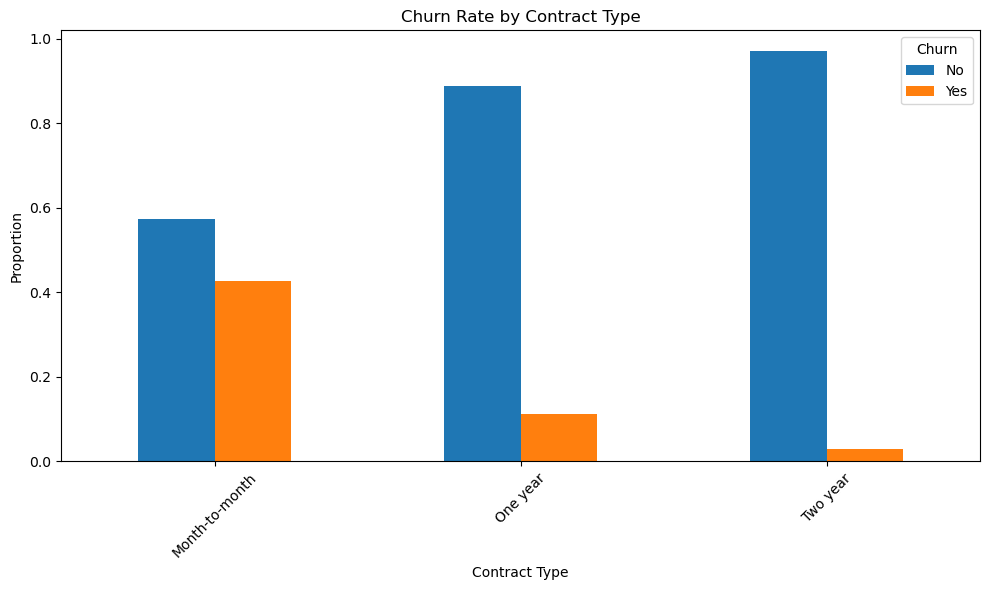

In [76]:
print("Contract Type Distribution:")
print(df['Contract'].value_counts())

print("\nChurn Rate by Contract Type:")
churn_by_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
print(churn_by_contract)

# Visualize
churn_by_contract.plot(kind='bar', figsize=(10,6))
plt.title('Churn Rate by Contract Type')
plt.ylabel('Proportion')
plt.xlabel('Contract Type')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Churn by Payment Method


Payment Method Distribution:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

Churn Rate by Payment Method:
Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.832902  0.167098
Credit card (automatic)    0.847569  0.152431
Electronic check           0.547146  0.452854
Mailed check               0.808933  0.191067


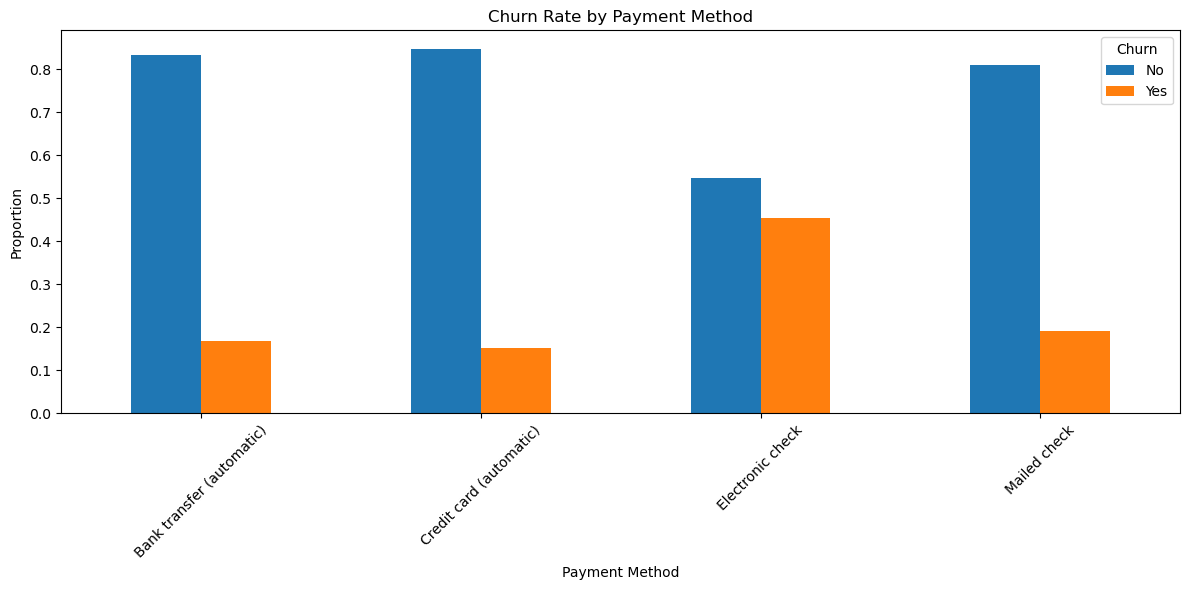

In [77]:
print("\nPayment Method Distribution:")
print(df['PaymentMethod'].value_counts())

print("\nChurn Rate by Payment Method:")
churn_by_payment = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
print(churn_by_payment)

# Visualize
churn_by_payment.plot(kind='bar', figsize=(12,6))
plt.title('Churn Rate by Payment Method')
plt.ylabel('Proportion')
plt.xlabel('Payment Method')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Churn by Internet Service


Internet Service Distribution:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Churn Rate by Internet Service:
Churn                  No       Yes
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050


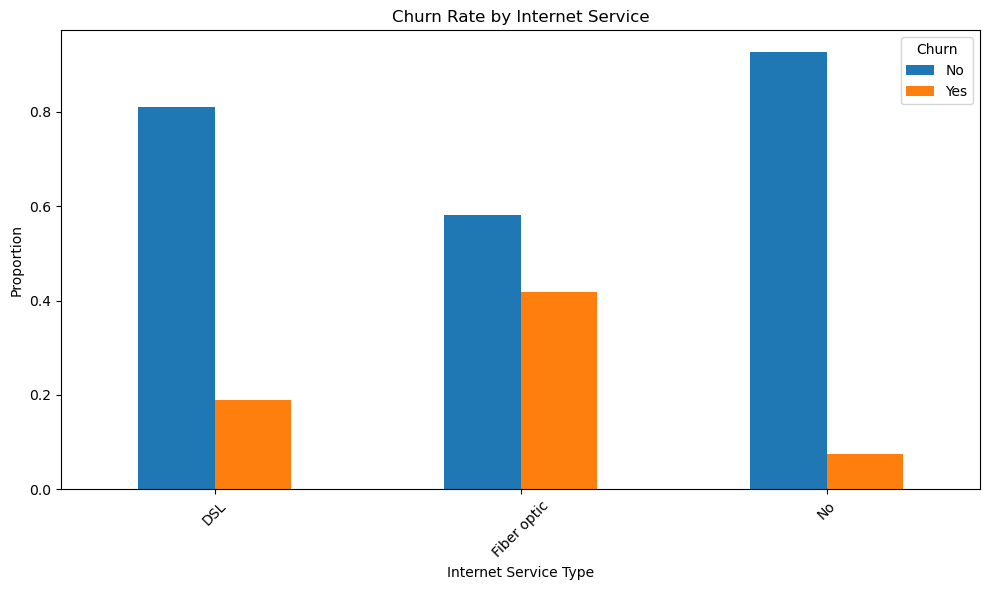

In [78]:
print("\nInternet Service Distribution:")
print(df['InternetService'].value_counts())

print("\nChurn Rate by Internet Service:")
churn_by_internet = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()
print(churn_by_internet)

# Visualize
churn_by_internet.plot(kind='bar', figsize=(10,6))
plt.title('Churn Rate by Internet Service')
plt.ylabel('Proportion')
plt.xlabel('Internet Service Type')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Churn by Tech Support


Tech Support Distribution:
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

Churn Rate by Tech Support:
Churn                      No       Yes
TechSupport                            
No                   0.583645  0.416355
No internet service  0.925950  0.074050
Yes                  0.848337  0.151663

Online Security Distribution:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Churn Rate by Online Security:
Churn                      No       Yes
OnlineSecurity                         
No                   0.582333  0.417667
No internet service  0.925950  0.074050
Yes                  0.853888  0.146112


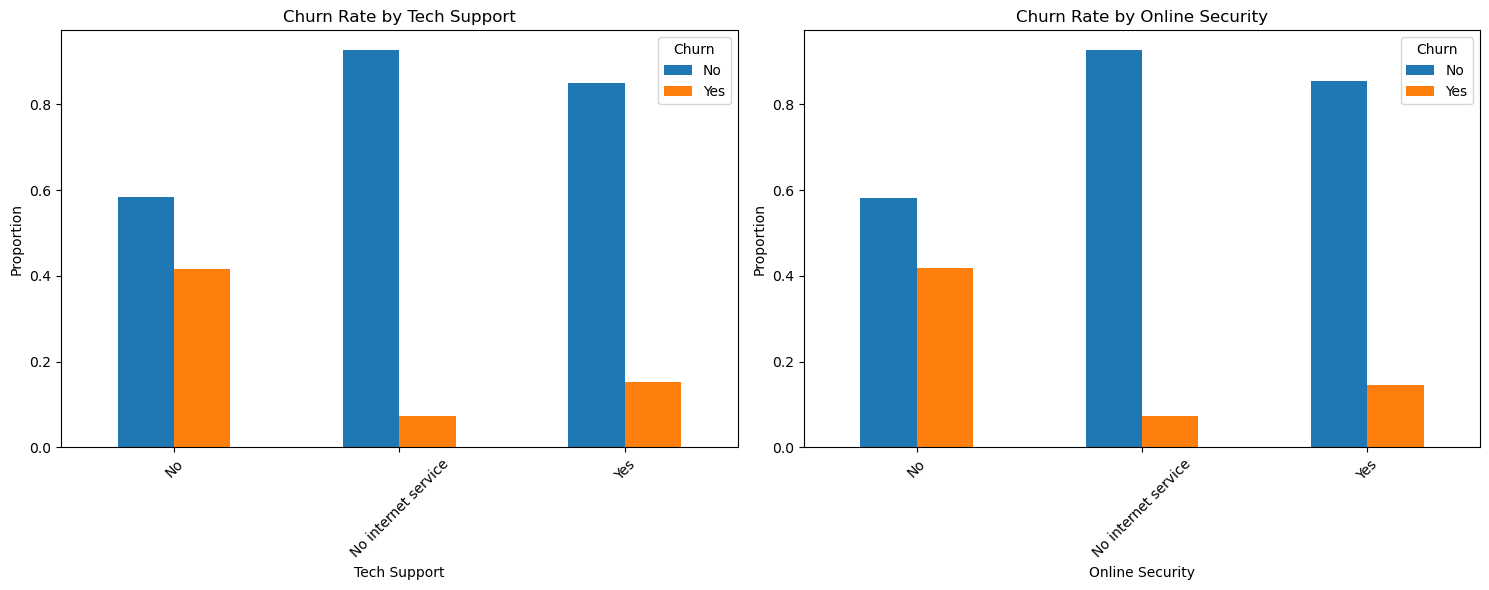

In [79]:
print("\nTech Support Distribution:")
print(df['TechSupport'].value_counts())

print("\nChurn Rate by Tech Support:")
churn_by_tech = df.groupby('TechSupport')['Churn'].value_counts(normalize=True).unstack()
print(churn_by_tech)

# Churn by Online Security
print("\nOnline Security Distribution:")
print(df['OnlineSecurity'].value_counts())

print("\nChurn Rate by Online Security:")
churn_by_security = df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True).unstack()
print(churn_by_security)

# Visualize both
fig, axes = plt.subplots(1, 2, figsize=(15,6))

churn_by_tech.plot(kind='bar', ax=axes[0])
axes[0].set_title('Churn Rate by Tech Support')
axes[0].set_ylabel('Proportion')
axes[0].set_xlabel('Tech Support')
axes[0].legend(title='Churn')
axes[0].tick_params(axis='x', rotation=45)

churn_by_security.plot(kind='bar', ax=axes[1])
axes[1].set_title('Churn Rate by Online Security')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('Online Security')
axes[1].legend(title='Churn')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Create a Risk Score

Churn Rate by Number of Services:
Churn               No       Yes
num_services                    
0             0.785940  0.214060
1             0.542443  0.457557
2             0.641820  0.358180
3             0.726297  0.273703
4             0.776995  0.223005
5             0.875657  0.124343
6             0.947183  0.052817


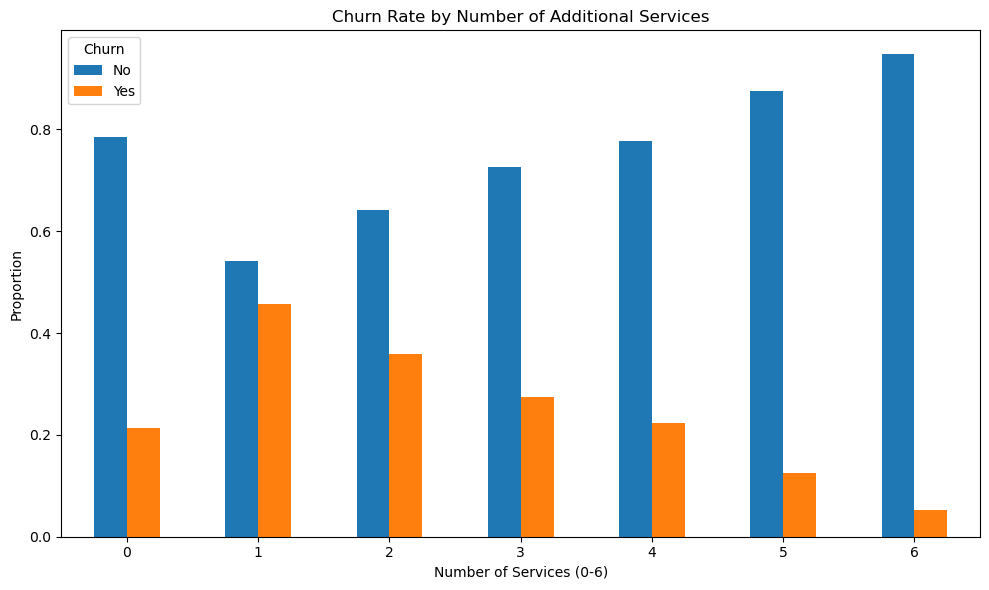

In [80]:
# Create features for analysis
# Count number of additional services
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

# Count services (excluding 'No internet service')
df['num_services'] = 0
for col in service_cols:
    df['num_services'] += (df[col] == 'Yes').astype(int)

# Churn by number of services
print("Churn Rate by Number of Services:")
churn_by_services = df.groupby('num_services')['Churn'].value_counts(normalize=True).unstack()
print(churn_by_services)

# Visualize
churn_by_services.plot(kind='bar', figsize=(10,6))
plt.title('Churn Rate by Number of Additional Services')
plt.ylabel('Proportion')
plt.xlabel('Number of Services (0-6)')
plt.legend(title='Churn')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Total Charges (lifetime value):

TotalCharges data type: object
Converted TotalCharges. Missing values: 11

Average Total Charges:
Churn
No     2555.344141
Yes    1531.796094
Name: TotalCharges, dtype: float64


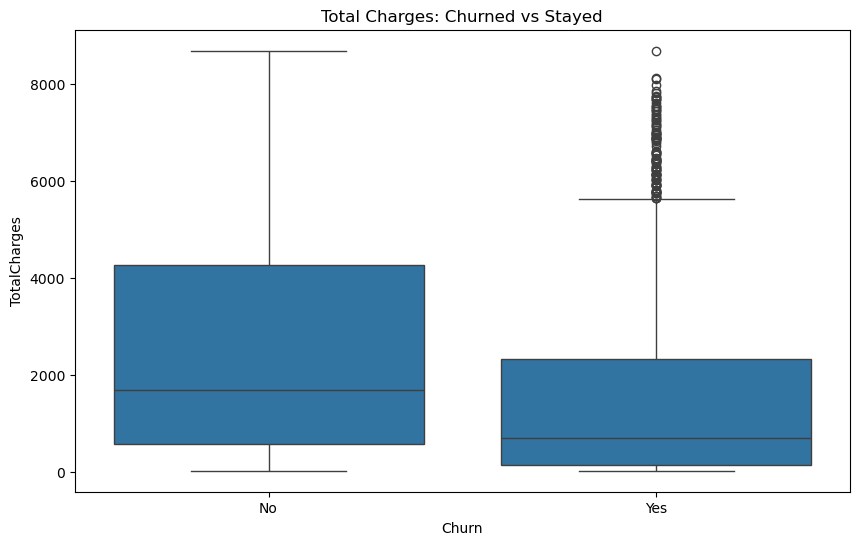

In [81]:

# First check data type
print("TotalCharges data type:", df['TotalCharges'].dtype)

# If it's an object (string), convert it
if df['TotalCharges'].dtype == 'object':
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    print(f"Converted TotalCharges. Missing values: {df['TotalCharges'].isnull().sum()}")

# Compare total charges
print("\nAverage Total Charges:")
print(df.groupby('Churn')['TotalCharges'].mean())

# Visualize
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('Total Charges: Churned vs Stayed')
plt.show()

## Export cleaned data with all features

In [82]:
df.to_csv('Customer_Churn_Analyzed.csv', index=False)
print("Data exported successfully!")

Data exported successfully!


## Create Summary Stats for Dashboard

In [83]:
summary_stats = pd.DataFrame({
    'Metric': [
        'Total Customers',
        'Churned Customers', 
        'Churn Rate (%)',
        'Avg Monthly Charges (Churned)',
        'Avg Monthly Charges (Stayed)',
        'Avg Total Charges (Churned)',
        'Avg Total Charges (Stayed)',
        'Month-to-Month Churn Rate (%)',
        'One Year Churn Rate (%)',
        'Two Year Churn Rate (%)'
    ],
    'Value': [
        len(df),
        len(df[df['Churn'] == 'Yes']),
        round(len(df[df['Churn'] == 'Yes']) / len(df) * 100, 2),
        round(df[df['Churn'] == 'Yes']['MonthlyCharges'].mean(), 2),
        round(df[df['Churn'] == 'No']['MonthlyCharges'].mean(), 2),
        round(df[df['Churn'] == 'Yes']['TotalCharges'].mean(), 2),
        round(df[df['Churn'] == 'No']['TotalCharges'].mean(), 2),
        42.71,  # From your analysis
        11.27,
        2.83
    ]
})

# Export summary
summary_stats.to_csv('Churn_Summary_Stats.csv', index=False)
print(summary_stats)

                          Metric    Value
0                Total Customers  7043.00
1              Churned Customers  1869.00
2                 Churn Rate (%)    26.54
3  Avg Monthly Charges (Churned)    74.44
4   Avg Monthly Charges (Stayed)    61.27
5    Avg Total Charges (Churned)  1531.80
6     Avg Total Charges (Stayed)  2555.34
7  Month-to-Month Churn Rate (%)    42.71
8        One Year Churn Rate (%)    11.27
9        Two Year Churn Rate (%)     2.83
